#1. Descripcion del problema

#Estadisticos de orden


**Entrada:** Una secuencia $a$ de $n$ números $[a_1, a_2, \ldots, a_n]$ y un número $k$ **menor al tamaño de la secuencia**.

**Salida:** El $k$-ésimo **menor elemento** de la secuencia $a$.

Un estadístico de orden es el $k$-ésimo menor elemento de una muestra, y este es una de las herramientas mas importantes de la estadística no paramétrica y de inferencia, además de tener muchas aplicaciones en diversas áreas, como la **ingeniería** y **data science**.

En este informe, presentaremos el algoritmo **Select**, que es capaz de resolver el problema de encontrar un estadístico de orden en una muestra no ordenada en **tiempo lineal**.


#2. Codigo

El siguiente codigo muestra la Implementacion de Select

##2.1

In [ ]:
import random
import numpy as np

def insertionSort(arreglo, cont):
  
  for i in range(1, len(arreglo)):
   
    elem = arreglo[i] #Variable que guarda el elemento en la posicion de la fila
    j = i
   
    #Si los elementos están desordenados y existe un predecesor entran al ciclo
    while(j > 0 and arreglo[j - 1] > elem):
      cont[0]+=1
      #Intercambio de posiciones entre los elementos
      arreglo[j], arreglo[j - 1]= arreglo[j - 1], arreglo[j]
      j = j - 1

  return arreglo      



def partition(arreglo, pivote, cont):
  cont[0]+=1
  posPivote = arreglo.index(pivote)
  if(pivote != 0):
    #intercambio
    arreglo[0], arreglo[posPivote] = arreglo[posPivote], arreglo[0]
  largo = len(arreglo)
  j = 1
  for i in range(1, largo)  : 
    cont[0]+=1
    if(arreglo[i] < arreglo[0]):
      arreglo[i], arreglo[j] = arreglo[j], arreglo[i]
      j+=1

  arreglo[0], arreglo[j - 1] = arreglo[j - 1], arreglo[0]
  return j-1

def pivotSelection(arreglo, cont):


  cont[0]+=1
  largo = len(arreglo) 
  # Caso 1, el largo del arreglo es 1
  if(largo == 1) : 
    return arreglo[0];

  #Caso 2 , el largo del arreglo <= 5
  if(largo <= 5):
    #ordenamos el arreglo y obtenemos su mediana
    arreglo = insertionSort(arreglo, cont)
    med = arreglo[largo//2]
    return med

  #Caso 3, el largo del arreglo > 5
  #Se debe subdividir el arreglo en grupos de 5 elementos ordenados y obtener 
  # sus medianas

  subarreglos = []
  medianas = []
  subarreglos = [arreglo[i:(i+5)] for i in range(0,largo,5)]
  numSubArreglos = len(subarreglos)

  for i in range (numSubArreglos) :
      cont[0] += 1
      subarreglos[i] = insertionSort(subarreglos[i], cont)

  medianas = [i[len(i)//2] for i in subarreglos]


  
 #Hasta no encontrar un caso base, llamamos recursivamente la función
  medianaFinal = pivotSelection(medianas, cont)
  return medianaFinal



def select(arreglo, k, cont):
  med = pivotSelection(arreglo,cont)
  pivote = partition(arreglo,med, cont)


  if(len(arreglo) == 1): return arreglo
  #caso 1
  if (pivote == (k - 1)): 
    cont[0] = cont[0] + 1

    return med;

  #caso 2
  if (pivote < (k - 1)):
    cont[0] = cont[0] + 1
    k = k - pivote - 1
    return select(arreglo[pivote + 1:], k, cont)

  #caso 3
  if (pivote > (k - 1)) :
    cont[0]+=1;
    return select(arreglo[:pivote], k, cont)




arreglo = [ 10, 4, 5, 8, 6, 11, 26 ]
cont = [0]
k = 3
print("Arreglo inicial: ", arreglo)
k_esimo = select(arreglo, k, cont)
print("k-esimo elemento mas pequeño: ", k_esimo)


Arreglo inicial:  [10, 4, 5, 8, 6, 11, 26]
k-esimo elemento mas pequeño:  6


##2.2 Descripcion del Algoritmo

El algoritmo de Select consiste en encontrar la posición i-ésima correspondiente al estadístco de orden que se está buscando mediante la realización de particiones recursivas al arreglo de entrada, alrededor de un pivote determinado. Este proceso de particiones es idéntico al utilizado en algoritmos como QuickSort, en el cual los elementos del arreglo son ordenados alrededor de un número llamado pivote. Así, el resto de elementos son ubicados a la izquierda del pivote si son menores a este, o a la derecha si es que son mayores.

**Entrada:** Un arreglo o lista con **n** cantidad de números, además de un índice **i**.

**Salida:** Un elemento con una ubicación q-ésima en el arreglo, cuya posición coincide con el índice **i** dado.

Como se mencionó anteriormente, este algoritmo repite el funcionamiento de el algoritmo QuickSort para realizar el método partition. La diferencia de Select con respecto a este algoritmo, es la forma en que se determina el pivote. Este algoritmo hace uso de la función llamada **pivot-seleccion**, la cual busca generar particiones lo más balanceadas posibles, mediante la búsqueda de un pivote que se acerque lo más posible a la mediana real del conjunto. Para conseguir esto esta función realiza los siguientes pasos.

* Se divide el arreglo de **n** elementos en una cantidad **$n/5$** de sub-arreglos que contengan $5$ elementos cada uno. Existe la posibilidad que el último sub-arreglo pueda tener menos de la cantidad mencionada.

* Ordena cada sub-arreglo utilizando Insertion Sort y busca la mediana de cada uno de ellos. Estas medianas se guardan simultáneamente en un arreglo auxiliar.

* Se aplica el mismo algoritmo Pivot Selection recursivamente sobre el arreglo de medianas hasta que su tamaño sea de 1 elemento. Este será por consecuencia la mediana del arreglo original.


Luego de aplicar esta función, el algoritmo select procede a comparar el índice $i$ que se está buscando, con la posición en la cual quedó el pivote luego de la función Pivot Selection, ante lo cual se desprederán estas 3 nuevas opciones:

* En caso de que $i$ sea igual a la posición del pivote, se retorna el elemento que se encuentre en esta posición.
* En caso de que $i$ sea mayor a la posición del pivote, se aplicará recursivamente el algoritmo Select a la mitad derecha del arreglo, que contiene a los valores mayores al pivote.
* En caso de que $i$ sea menor a la posición del pivote, se aplicará recursivamente este algoritmo a la mitad izquierda del arreglo, en la cual están los números menores al pivote.




##2.3 Ejemplo

### ***Consideremos el arreglo:***
[10, 4, 5, 8, 6, 11, 26, 30]
y queremos el ***3er elemento más pequeño***.

- El arreglo ordenado :
  [4, 5, 6, 8, 10, 11, 26, 30]. 

Así que el 3ero más pequeño es el número 6.

 ***1. Como entrada:***
[10, 4, 5, 8, 6, 11, 26, 30] y k = 3.

Pivote: 4. 
- Arreglo: [10, 5, 8, 6, 11, 26, 30]

### ***2. El algoritmo llama recursivamente:***

Selección rápida: [10, 5, 8, 6, 11, 26, 30} y k = 2. 

Pivote: 5.

- Arreglo: [10, 8, 6, 11, 26, 30]

Reducimos el valor de k de 3 a 2. Ahora estamos buscando el segundo elemento más pequeño.

Se llama recursivamente nuevamente: 

Selección rápida: [10, 8, 6, 11, 26, 30] y k = 1.

El valor de k se reduce de manera similar.


### ***3. Elegimos nuevo pivote aleatorio:***

Pivote: 26. 

* Arreglo: [10, 8, 6, 11]. 

Eliminar: [30].

Como el 30 es mayor, se elimina.

El algoritmo llama recursivamente: 

Selección rápida: [10, 8, 6, 11] y k = 1.

Aquí el valor de k no se reduce ya que no nos deshacemos de ningún elemento.

Pivote: 10. 

* Arreglo: [8, 6].

Eliminar: [11].

Recursivamente llamamos a selección rápida: [8, 6] y k = 1

Pivote: 6. 

* Arreglo: [6].

Eliminar: [8].

**Por lo tanto, el k = 3 más pequeño es 6.**


#3. Tiempo de Ejecucion
El tiempo de ejecución de este algoritmo se basa en las funciones que realiza este algoritmo para poder cumplir su objetivo de manera eficiente, sabemos que:



**Insertion Sort**: En el mejor caso, su tiempo de ejecución es $O(1)$ y en el peor es $O(n^2)$, pero nos quedaremos con el dato de mejor caso.



**Partition y pivotSelection** : Estas funciones tiene un tiempo de ejecución lineal, $O(n)$


Nuestro arreglo "medianas" contiene n/5 elementos  y esto se obtiene a la recursividad de los llamados para poder encontrar la mediana de medianas, es por esto, que el tiempo de ejecución para poder llevar a cabo lo mencionado anteriormente es $T(n/5)$.



Nuestro peor caso sería que por cada llamada recursiva el subarreglo contenga $T(7n/10)$ elementos.



Finalmente, tenemos : **T(n) = O(n) + T(7n/10) + T(n/5)**, desarrollandolo:

T(n) = an +  T(7n/10) + T(n/5)

cn >= T(7n/10) + T(n/5) + an

cn >= cn/5 + 7cn/10 + an

c > 9c/10 + a

c/10 >= a

c >= 10a

Por lo que: ***T(n) = O(n)***


#4. Correctitud

## Correctitud select

Para probar la correctitud del algoritmo select, usaremos inducción. Plantearemos un caso base y en base a este probaremos que se cumple la correctitud para todo el algoritmo.

Asumiendo que partition, pivotSelection e insertionSort funcionan correctamente.

**Caso base (El arreglo solo tiene un elemento)**


* Para nuestro caso base, como nuestro arreglo solo tiene un elemento asumimos que trivialmente es el
iesimo menor número que estamos buscando.

**Caso 2 (El arreglo tiene <= 5 elementos)**


* El arreglo entrará a pivotSelection, el cual generará un solo sub arreglo (dado que son menos de 5 
elementos), lo ordenara y retornara la mediana. Posteriormente partition usara la mediana como pivote 
y retornará dos subarreglos, con los elementos mayores al pivote y otro con los menores, dado que solo hay 
dos elementos quedaran dos subarreglos de 1 elemento. Dependiendo de si el elemento que buscamos es mayor
o menor al pivote que retorna partition, elegimos el subarreglo con el que trabajaremos y se llamará 
recursivamente a select con un subarreglo de 1 solo elemento, donde se cumplirá el caso base.

**Caso 3 (El arreglo tiene más de 5 elementos)**


* Sabiendo que la función partition va a dividir en dossubarreglos y además  select es un algoritmo 
recursivo, entonces el algoritmo select trabajara con arreglos más pequeños hasta llegar al caso base.

  En el caso de que el elemento k-ésimo sea menor a q(pivot), se trabajara con el arreglo derecho que se
peticionará y se escogerá nuevamente un pivot de la mediana de medianas que hará que se vuelva a dividir 
el arreglo en 2 hasta que se cumpla el caso base.

  Es importante resaltar que el k-ésimo elemento no va a estar siempre al mismo lado del pivote en cada 
iteración, esto nos lleva a darnos cuenta de que el caso 3 y el caso 2 se complementan durante la 
ejecución del algoritmo select.




#5 experimentos

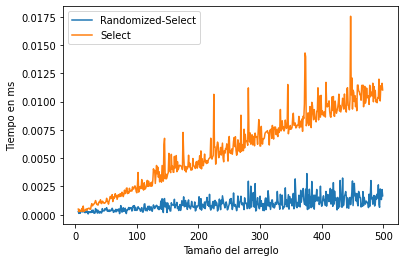

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat


x=[]; y=[]
y1=[]


for n in range(5,500):

  a = random.sample(range(1, 500), n)
  cont = [0]
 
  #la función repeat está ejecutando 20 veces insertion_Sort con el arreglo a y retorna el mejor tiepo obtenido.
  t1 = repeat(setup="from __main__ import Randomizedselect", stmt=f"Randomizedselect({a},{0},{n-1},{3})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import select", stmt=f"select({a},{3},{cont})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["Randomized-Select", "Select"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

**Analisis de los resultados**


El algoritmo **Select** se diferencia de Randomized-select en la **selección del pivote para realizar la partición.** Y su principal diferencia es que divide el conjunto de **n** elementos en (n/5) **siempre**, sin importar el tamaño de este, es por eso, que apesar de tener la misma funcionalidad, Randomized-select es mucho más eficiente, debido que se mantiene constante apesar que el tamaño vaya aumentando.
